# High order epistasis in glucocorticoid receptor evolution

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json

import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 10

# Epistasis imports
from epistasis.models.linear import LocalEpistasisModel
from epistasis.plotting import bar_with_xbox
from seqspace import GenotypePhenotypeMap

## Introduction

Load data from `.json` file.

In [26]:
in_path = "../../Dropbox/epistasis-paper/datasets/bridgham3.json"
out_path = "../../Dropbox/epistasis-paper/figures/supplement/figure-03/epistasis-bridgham3"

In [27]:
model = LocalEpistasisModel.from_json(in_path)

## Epistasis Analysis

Initialize and fit epistasis model to log transformed data, following e

In [28]:
from scipy.stats import norm

In [24]:
zscore = -abs(model.Interactions.Raw.values - 1) / model.Interactions.Raw.err.upper

In [25]:
norm.cdf(zscore)

array([  4.26855169e-07,   3.46275749e-04,   1.58169648e-01,
         0.00000000e+00,   4.46362683e-01,   0.00000000e+00,
         0.00000000e+00,   1.87196553e-02,   0.00000000e+00,
         1.38305951e-25,   6.12218476e-03,   1.75294934e-08,
         5.57055753e-02,   4.43864720e-01,   2.71603127e-09,
         3.66277637e-02,   1.23754324e-01,   1.25706896e-01,
         8.13278520e-02,   8.00392623e-02,   2.64551294e-02,
         2.18772096e-58,   1.39692010e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.03512826e-01,   4.50871072e-01,   1.81690474e-01,
         1.85673808e-01,   2.30097341e-01])

In [4]:
model = LocalEpistasisModel.from_json(in_path)
model.fit()
model.fit_error()

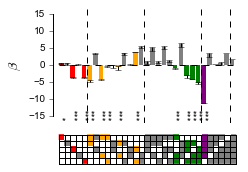

In [5]:
fig, ax = bar_with_xbox(model, log_space=True, sigmas=1,height_ratio=3.8,figsize=(3.5,2.5),star_spacer=.03)
ax[0].set_ylabel("$\\beta$")

In [6]:
fig.savefig(out_path +".svg", format="svg")

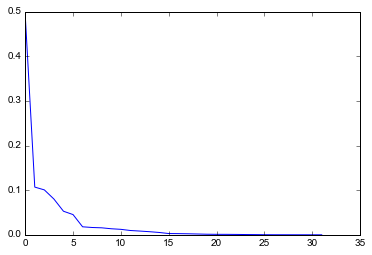

In [29]:
from epistasis.models.pca import EpistasisPCA
pca = EpistasisPCA.from_json(in_path, order=5)
pca.fit()
plt.plot(pca.explained_variance_ratio)

In [30]:
sum(pca.explained_variance_ratio[0:5])

0.83354228581882095